In [1]:
import sys
import pandas as pd

sys.path.append("../utils")
from figures_plotly import (
    convert_columns_names,
    process_product_column,
    plot_bar_percentage,
    plot_weekly_distribution,
    plot_weekday_distribution,
    plot_pie_chart,
    plot_stacked_barh,
    plot_joint_distribution,
    plot_linear_weekday_distribution,
    plot_line_weekday,
)
from figures_matplotlib import plot_joint_distribution
from pathlib import Path
from utils import change_values
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

In [2]:
base = "no_fraude"
PATH_FIGS = Path(
    f"C:/Users/dflunan/Documents/davivienda-causa-raiz/results/figs/{base}/"
)
df = pd.read_excel(f"../../results/{base}_abril_v14-06-24.xlsx")
df = convert_columns_names(df)
df = process_product_column(df)
df = change_values(df, "medio_de_radicacion", 0, "Otros")
df = change_values(df, "medio_de_respuesta", 0, "Otros")
df = change_values(df, "category", "Categoria no identificada", "Otros")
df = change_values(df, "category", "Felicitación a funcionario", "Otros")
df = change_values(df, "category", "Transacciones", "Otros")

In [9]:
df.head(3)

,numero_ss,tipo,canal_origen,motivo2,fecha_apertura,fecha_compromiso,estado,responsable,usu,des2,...,recurrente,reincidente,queja_express,admision,producto,category,subcategory,medio_de_radicacion,medio_de_respuesta,producto_
0,1-41926549659,Reclamación Super,Clientes,Inconformidad en el saldo,2024-04-01,2024-04-15,Asignado,SGHERNAN,YLSUAREZ,DEPTO. OP CALL CENTER EMPRESARIAL,...,0.0,0.0,NO,NaN,CREDITO ADELANTO DE NOMINA,Peticiones,Aclaración de información y movimiento,NaN,NaN,CREDITO ADELANTO DE NOMINA
1,1-41933756448,Novedad Monetaria,Clientes,Descuento y no pago,2024-04-01,2024-04-15,En gestión,DANIDARR,JMAESTRE,DEPTO. OP CALL CENTER EMPRESARIAL,...,NaN,NaN,NaN,NaN,CUENTA DE AHORROS DAMAS-TRADICIONAL,Peticiones,Consulta de información,NaN,NaN,CUENTA DE AHORROS DAMAS
2,1-41943159223,Reclamación Super,Clientes,Datos de la transacción,2024-04-01,2024-04-15,Asignado,AMLLANOS,AAFORERO,DEPTO. CIRCULOS DE LOGISTICA,...,0.0,0.0,NO,NaN,CUENTA DE AHORROS DAMAS-EMPRESARIAL,Quejas,Inconformidad en el saldo y gestión cobranza,NaN,NaN,CUENTA DE AHORROS DAMAS


In [10]:
df.shape

(6608, 37)

# Categoria

In [15]:
fig = plot_pie_chart(
    df, "category", percentage_threshold=0, n_colors=4, title="Categoría"
)
fig.write_image(PATH_FIGS.joinpath("category.png"))
fig.show()

# Subcategoria: causa raiz

In [14]:
fig = plot_bar_percentage(
    df, "subcategory", title="Distribución de categorias", percentage=98
)
fig.write_image(PATH_FIGS.joinpath("subcategory.png"))
fig.show()

### Peticiones

In [16]:
cat = "Peticiones"
fig = plot_bar_percentage(
    df[df["category"] == cat],
    "subcategory",
    title=f"{cat}: Distribución de categorias",
    percentage=99,
)
fig.write_image(PATH_FIGS.joinpath(f"{cat}_subcategory.png"))
fig.show()

### Quejas

In [71]:
cat = "Quejas"
fig = plot_bar_percentage(
    df[df["category"] == cat],
    "subcategory",
    title=f"{cat}: Distribución de categorias",
    percentage=99,
)
fig.write_image(PATH_FIGS.joinpath(f"{cat}_subcategory.png"))
fig.show()

### Reclamos

In [72]:
cat = "Reclamos"
fig = plot_bar_percentage(
    df[df["category"] == cat],
    "subcategory",
    title=f"{cat}: Distribución de categorias",
    percentage=99,
)
fig.write_image(PATH_FIGS.joinpath(f"{cat}_subcategory.png"))
fig.show()

# Temporalidad

In [19]:
fig = plot_line_weekday(df, title="Distribución temporal", threshold=80)
fig.write_image(PATH_FIGS.joinpath("line_weekday.png"))
fig.show()

### Peticiones

In [78]:
cat = "Peticiones"
fig = plot_line_weekday(df[df["category"] == cat], title=cat)
fig.write_image(PATH_FIGS.joinpath(f"{cat}_line_weekday.png"))
fig.show()

### Reclamos

In [81]:
cat = "Reclamos"
fig = plot_line_weekday(df[df["category"] == cat], title=cat)
fig.write_image(PATH_FIGS.joinpath(f"{cat}_line_weekday.png"))
fig.show()

### Quejas

In [82]:
cat = "Quejas"
fig = plot_line_weekday(df[df["category"] == cat], title=cat)
fig.write_image(PATH_FIGS.joinpath(f"{cat}_line_weekday.png"))
fig.show()

# Segmento comercial

In [23]:
fig = plot_pie_chart(
    df, "segmento_comercial", 2, n_colors=6, title="Segmento comercial"
)
fig.write_image(PATH_FIGS.joinpath("segmento_comercial.png"))
fig.show()

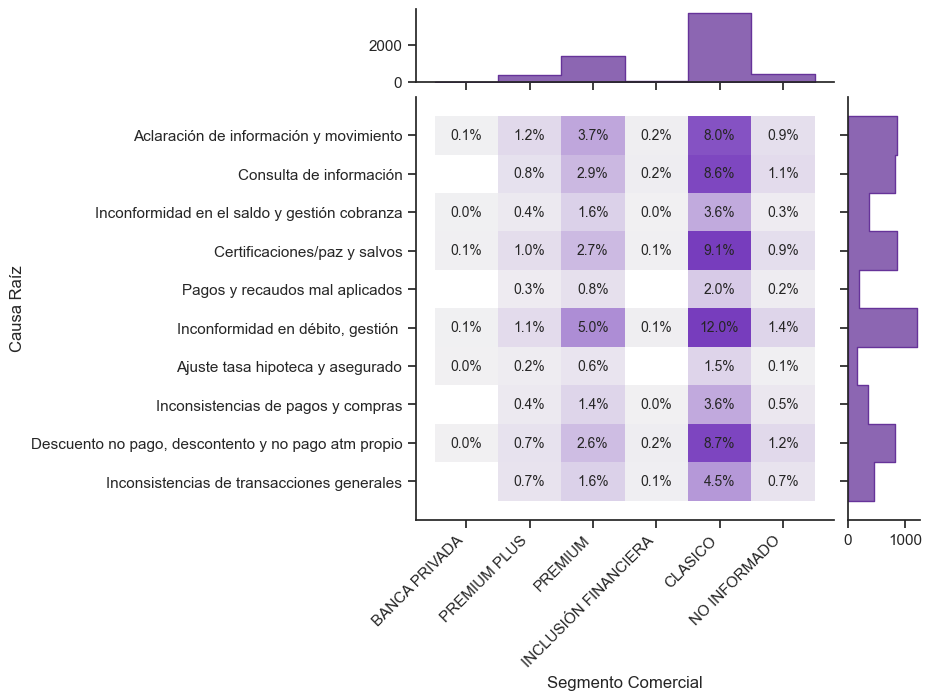

In [7]:
order = [
    "BANCA PRIVADA",
    "PREMIUM PLUS",
    "PREMIUM",
    "INCLUSIÓN FINANCIERA",
    "CLASICO",
    "NO INFORMADO",
]

fig = plot_joint_distribution(
    df,
    x="segmento_comercial",
    y="subcategory",
    x_order=order,
    # y_order=index_order,
    label_rotation=45,
    y_label="Causa Raíz",
    x_label="Segmento Comercial",
    top_y=10,
)


### Peticiones

In [84]:
cat = "Peticiones"
fig = plot_pie_chart(
    df[df["category"] == cat],
    "segmento_comercial",
    2,
    n_colors=6,
    title=f"{cat}: Segmento comercial",
)
fig.write_image(PATH_FIGS.joinpath(f"{cat}_segmento_comercial.png"))
fig.show()

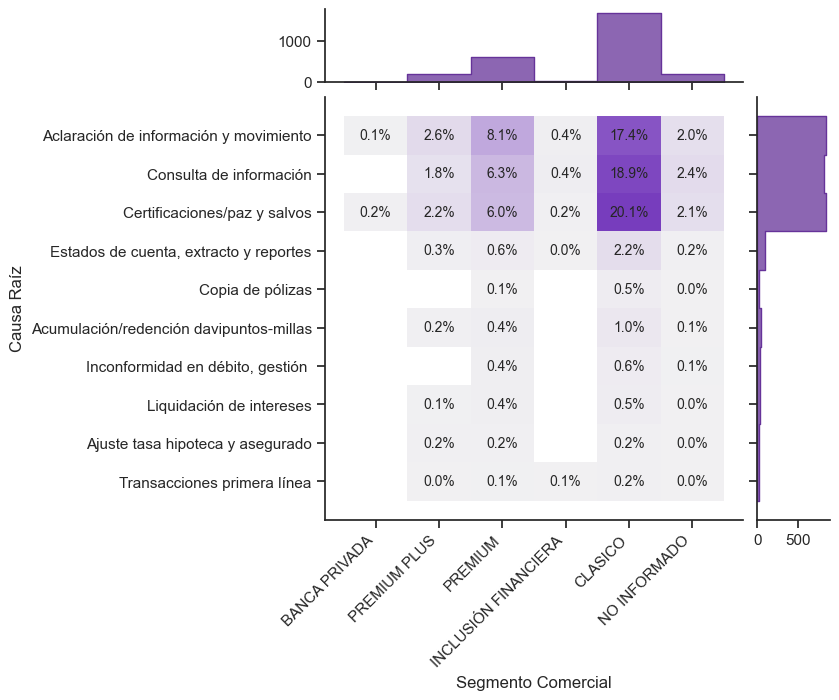

In [85]:
order = [
    "BANCA PRIVADA",
    "PREMIUM PLUS",
    "PREMIUM",
    "INCLUSIÓN FINANCIERA",
    "CLASICO",
    "NO INFORMADO",
]

plot_joint_distribution(
    df[df["category"] == cat],
    x="segmento_comercial",
    y="subcategory",
    x_order=order,
    # y_order=index_order,
    label_rotation=45,
    y_label="Causa Raíz",
    x_label="Segmento Comercial",
    top_y=10,
    path_save=PATH_FIGS.joinpath(f"{cat}_joint_distribution.png"),
)

### Reclamos

In [86]:
cat = "Reclamos"
fig = plot_pie_chart(
    df[df["category"] == cat],
    "segmento_comercial",
    2,
    n_colors=6,
    title=f"{cat}: Segmento comercial",
)
fig.write_image(PATH_FIGS.joinpath(f"{cat}_segmento_comercial.png"))
fig.show()

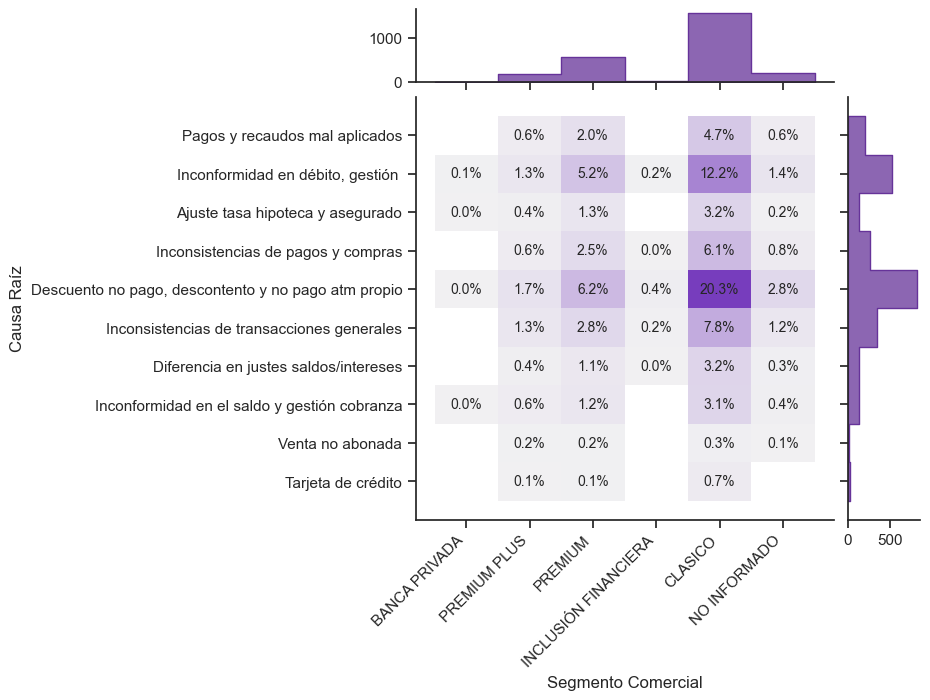

In [87]:
order = [
    "BANCA PRIVADA",
    "PREMIUM PLUS",
    "PREMIUM",
    "INCLUSIÓN FINANCIERA",
    "CLASICO",
    "NO INFORMADO",
]

plot_joint_distribution(
    df[df["category"] == cat],
    x="segmento_comercial",
    y="subcategory",
    x_order=order,
    # y_order=index_order,
    label_rotation=45,
    y_label="Causa Raíz",
    x_label="Segmento Comercial",
    top_y=10,
    path_save=PATH_FIGS.joinpath(f"{cat}_joint_distribution.png"),
)

### Quejas

In [88]:
cat = "Quejas"
fig = plot_pie_chart(
    df[df["category"] == cat],
    "segmento_comercial",
    2,
    n_colors=6,
    title=f"{cat}: Segmento comercial",
)
fig.write_image(PATH_FIGS.joinpath(f"{cat}_segmento_comercial.png"))
fig.show()

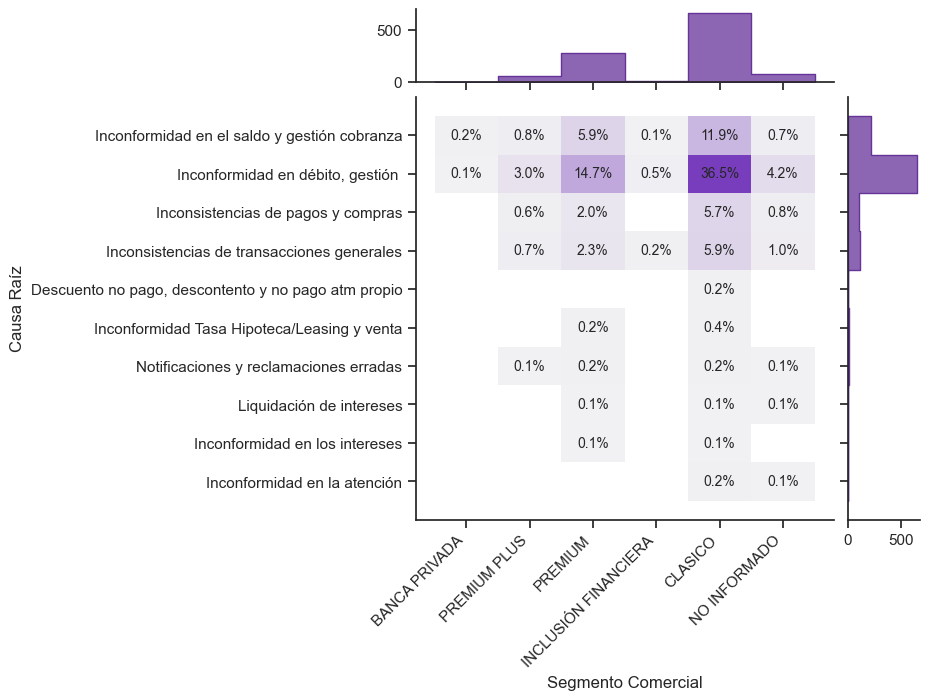

In [89]:
order = [
    "BANCA PRIVADA",
    "PREMIUM PLUS",
    "PREMIUM",
    "INCLUSIÓN FINANCIERA",
    "CLASICO",
    "NO INFORMADO",
]

plot_joint_distribution(
    df[df["category"] == cat],
    x="segmento_comercial",
    y="subcategory",
    x_order=order,
    # y_order=index_order,
    label_rotation=45,
    y_label="Causa Raíz",
    x_label="Segmento Comercial",
    top_y=10,
    path_save=PATH_FIGS.joinpath(f"{cat}_joint_distribution.png"),
)

# Producto

In [90]:
fig = plot_pie_chart(df, "producto_", 2, n_colors=9, title="Producto", legend_y=-0.8)
fig.write_image(PATH_FIGS.joinpath("producto.png"))
fig.show()

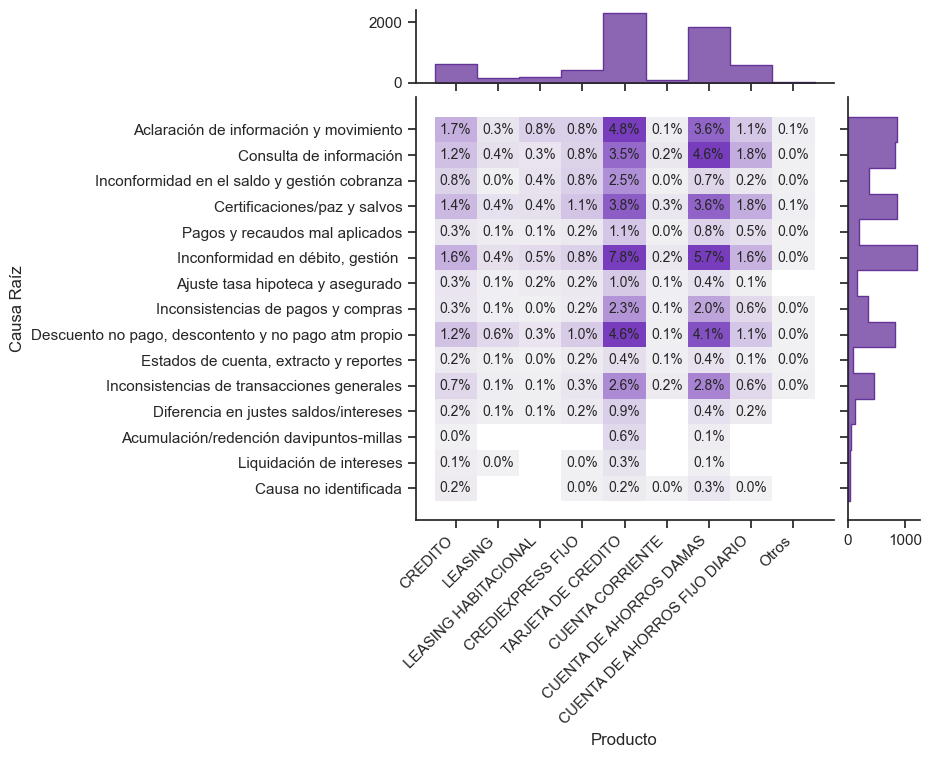

In [91]:
col_order = [
    "CREDITO",
    "LEASING",
    "LEASING HABITACIONAL",
    "CREDIEXPRESS FIJO",
    "TARJETA DE CREDITO",
    "CUENTA CORRIENTE",
    "CUENTA DE AHORROS DAMAS",
    "CUENTA DE AHORROS FIJO DIARIO",
    "Otros",
]

plot_joint_distribution(
    df,
    x="producto_",
    y="subcategory",
    x_order=col_order,
    # y_order=index_order,
    label_rotation=45,
    y_label="Causa Raíz",
    x_label="Producto",
    top_y=15,
    path_save=PATH_FIGS.joinpath("joint_distribution_producto.png"),
)

### Peticiones

In [66]:
cat = "Peticiones"
fig = plot_pie_chart(
    df[df["category"] == cat],
    "producto_",
    2,
    n_colors=9,
    legend_y=-0.8,
)
fig.write_image(PATH_FIGS.joinpath(f"{cat}_producto.png"))
fig.show()

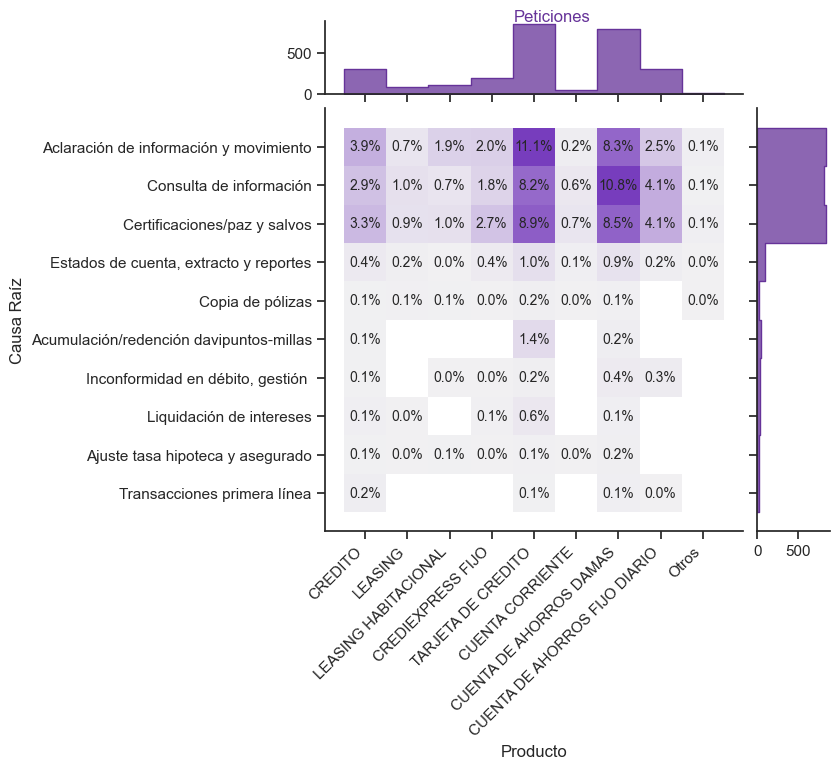

In [44]:
plot_joint_distribution(
    df[df["category"] == cat],
    x="producto_",
    y="subcategory",
    x_order=col_order,
    # y_order=index_order,
    label_rotation=45,
    y_label="Causa Raíz",
    x_label="Producto",
    top_y=10,
    title=cat,
    path_save=PATH_FIGS.joinpath(f"{cat}_joint_distribution_producto.png"),
)

### Reclamos

In [67]:
cat = "Reclamos"
fig = plot_pie_chart(
    df[df["category"] == cat],
    "producto_",
    2,
    n_colors=9,
    legend_y=-0.8,
)
fig.write_image(PATH_FIGS.joinpath(f"{cat}_producto.png"))
fig.show()

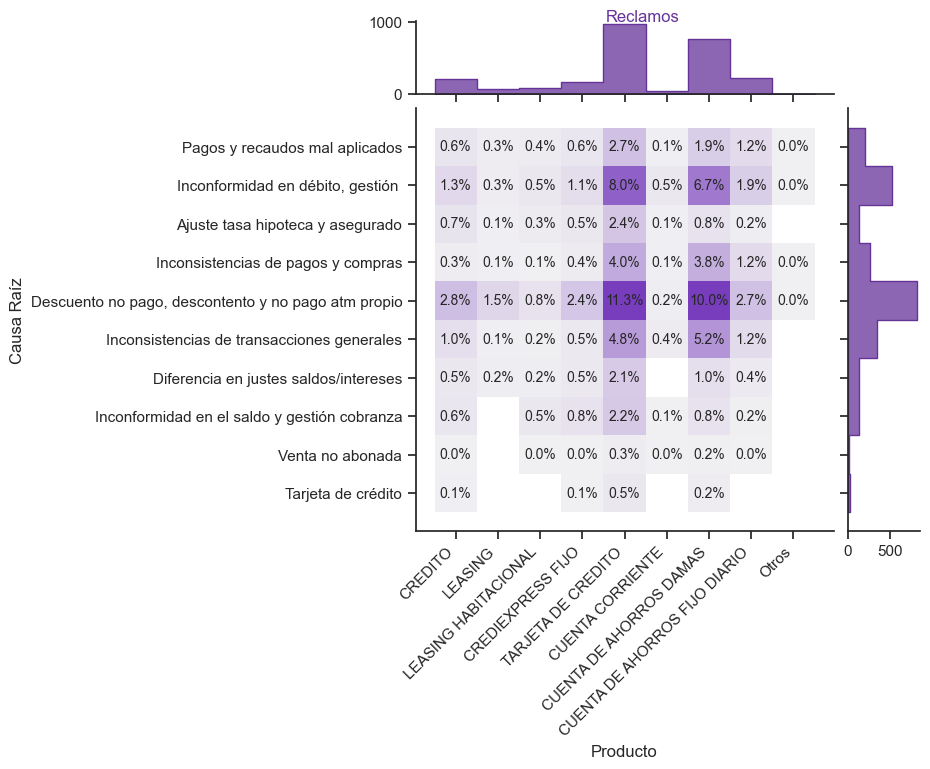

In [46]:
plot_joint_distribution(
    df[df["category"] == cat],
    x="producto_",
    y="subcategory",
    x_order=col_order,
    # y_order=index_order,
    label_rotation=45,
    y_label="Causa Raíz",
    x_label="Producto",
    top_y=10,
    title=cat,
    path_save=PATH_FIGS.joinpath(f"{cat}_joint_distribution_producto.png"),
)

### Quejas

In [68]:
cat = "Quejas"
fig = plot_pie_chart(
    df[df["category"] == cat],
    "producto_",
    2,
    n_colors=9,
    legend_y=-0.8,
)
fig.write_image(PATH_FIGS.joinpath(f"{cat}_producto.png"))
fig.show()

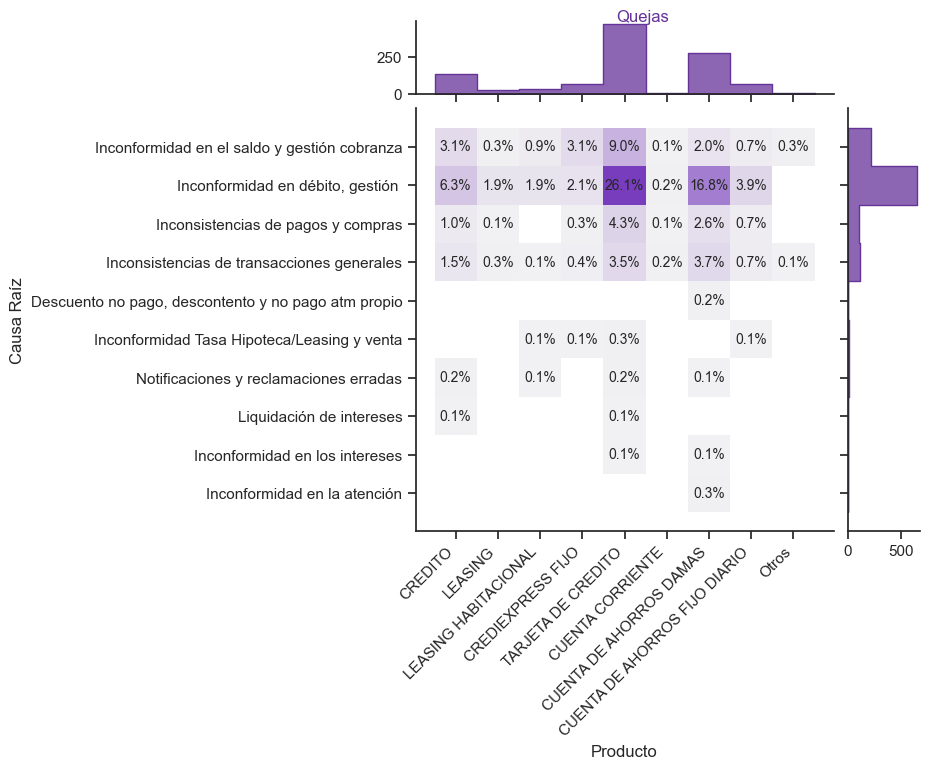

In [48]:
plot_joint_distribution(
    df[df["category"] == cat],
    x="producto_",
    y="subcategory",
    x_order=col_order,
    # y_order=index_order,
    label_rotation=45,
    y_label="Causa Raíz",
    x_label="Producto",
    top_y=10,
    title=cat,
    path_save=PATH_FIGS.joinpath(f"{cat}_joint_distribution_producto.png"),
)

# Comparación modelo vs tipificación

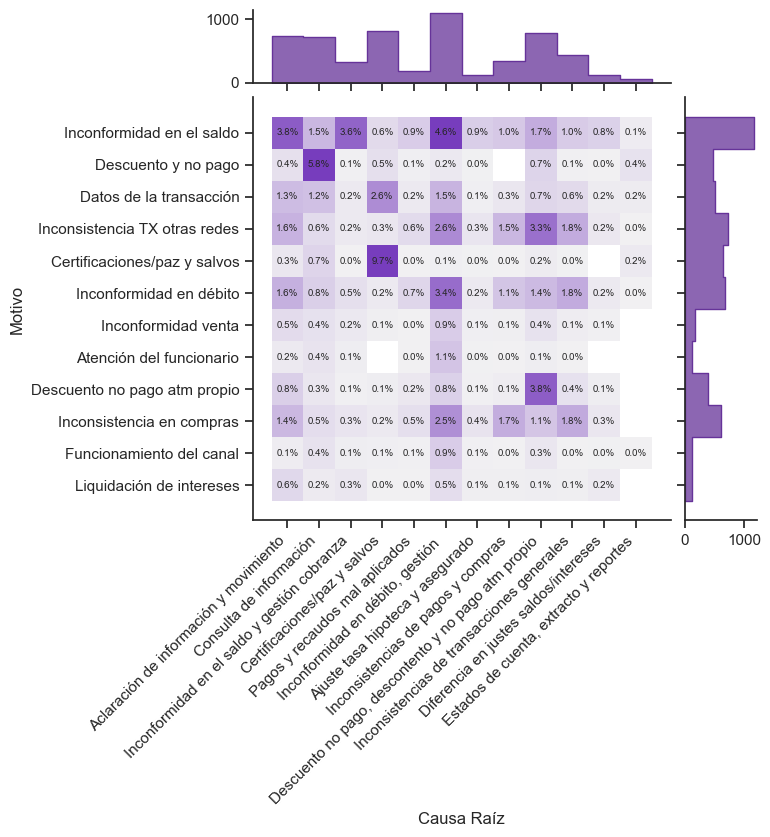

In [92]:
plot_joint_distribution(
    df,
    x="subcategory",
    y="motivo",
    x_order=None,
    y_order=None,
    label_rotation=45,
    y_label="Motivo",
    x_label="Causa Raíz",
    top_y=12,
    top_x=12,
    fontsize=7,
    path_save=PATH_FIGS.joinpath("joint_distribution_motivo.png"),
)

### Peticiones

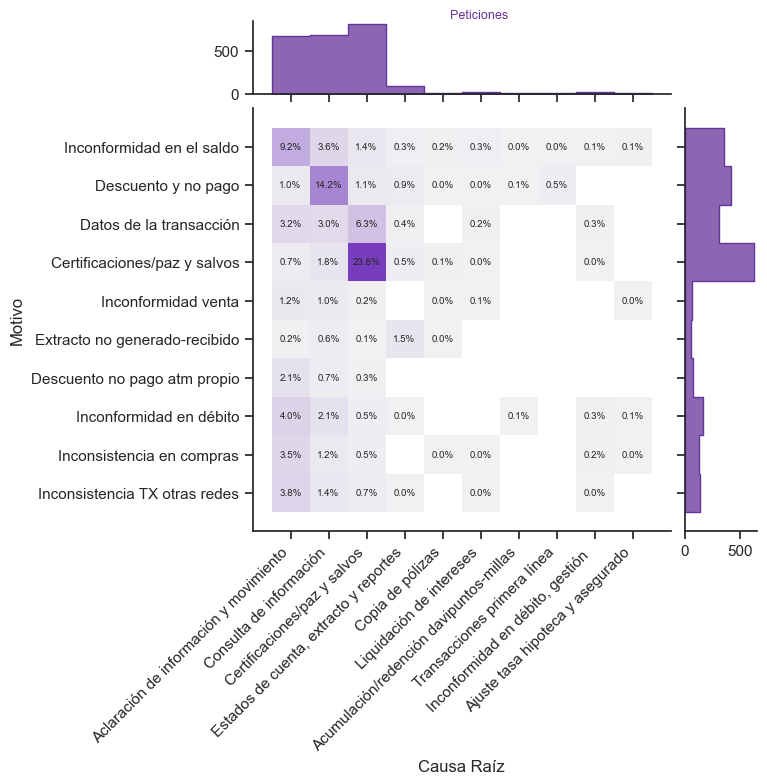

In [50]:
cat = "Peticiones"
plot_joint_distribution(
    df[df["category"] == cat],
    x="subcategory",
    y="motivo",
    x_order=None,
    y_order=None,
    label_rotation=45,
    y_label="Motivo",
    x_label="Causa Raíz",
    top_y=10,
    top_x=10,
    fontsize=7,
    title=cat,
    path_save=PATH_FIGS.joinpath(f"{cat}_joint_distribution_motivo.png"),
)

### Reclamos

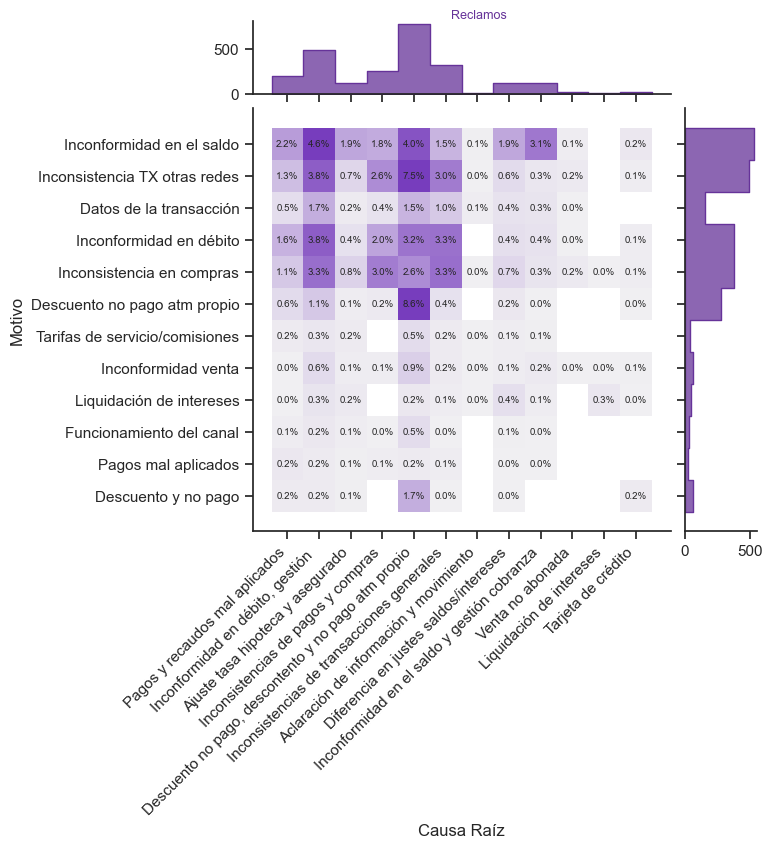

In [51]:
cat = "Reclamos"
plot_joint_distribution(
    df[df["category"] == cat],
    x="subcategory",
    y="motivo",
    x_order=None,
    y_order=None,
    label_rotation=45,
    y_label="Motivo",
    x_label="Causa Raíz",
    top_y=12,
    top_x=12,
    fontsize=7,
    title=cat,
    path_save=PATH_FIGS.joinpath(f"{cat}_joint_distribution_motivo.png"),
)

### Quejas

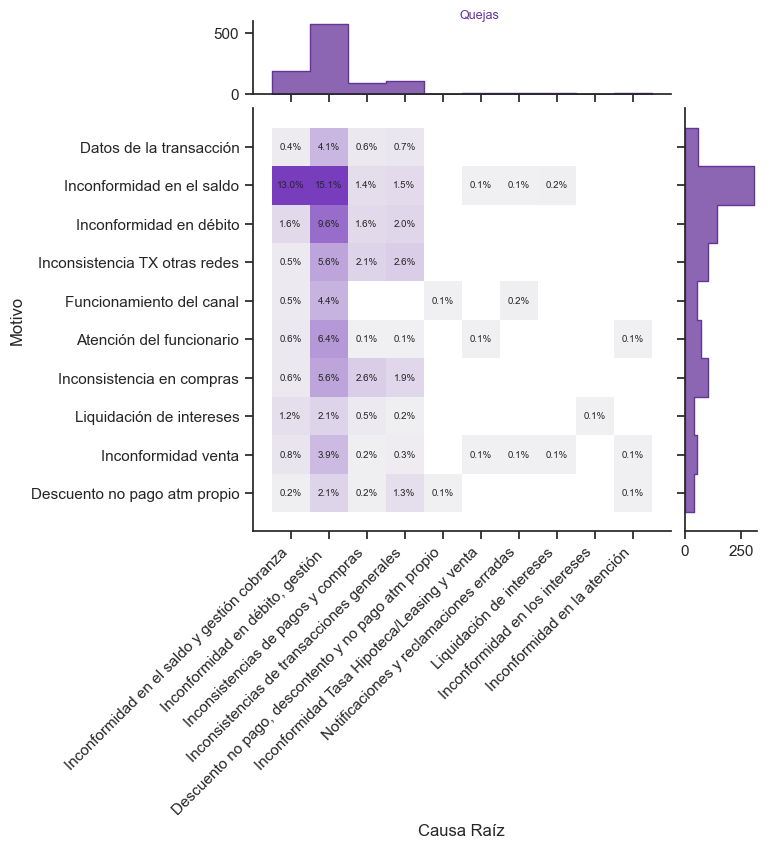

In [52]:
cat = "Quejas"
plot_joint_distribution(
    df[df["category"] == cat],
    x="subcategory",
    y="motivo",
    x_order=None,
    y_order=None,
    label_rotation=45,
    y_label="Motivo",
    x_label="Causa Raíz",
    top_y=10,
    top_x=10,
    fontsize=7,
    title=cat,
    path_save=PATH_FIGS.joinpath(f"{cat}_joint_distribution_motivo.png"),
)

In [99]:
# from pandasgui import show
# show(df)

In [56]:
# Diccionario de mapeo (simplificado para el ejemplo)
mapping_dict = {
    "Inconformidad en el saldo": "Inconformidad en el saldo y gestión cobranza",
    "Inconsistencia TX otras redes": "Inconsistencias de transacciones generales",
    "Inconformidad en débito": "Inconformidad en débito, gestión y premio",
    "Certificaciones/paz y salvos": "Certificaciones/paz y salvos",
    "Inconsistencia en compras": "Inconsistencias de pagos y compras",
    "Datos de la transacción": "Consulta de información",
    "Descuento y no pago": "Descuento no pago, descontento y no pago atm propio",
    "Descuento no pago atm propio": "Descuento no pago, descontento y no pago atm propio",
    "Inconformidad venta": "Inconformidad en el saldo y gestión cobranza",
    "Liquidación de intereses": "Liquidación de intereses",
    "Funcionamiento del canal": "Mal funcionamiento de canales",
    "Atención del funcionario": "Inconformidad en la atención",
    "Tarifas de servicio/comisiones": "Inconformidad tarifas y comisiones",
    "Extracto no generado-recibido": "Estados de cuenta, extracto y reportes",
    "Inconformidad sobre el premio": "Acumulación/redención davipuntos-millas",
    "Pagos mal aplicados": "Pagos y recaudos mal aplicados",
    "Estados de cuenta": "Estados de cuenta, extracto y reportes",
    "Reporte o calificación": "Estados de cuenta, extracto y reportes",
    "Inconformidad gestión cobranza": "Inconformidad en el saldo y gestión cobranza",
    "Acumulación davipuntos-millas": "Acumulación/redención davipuntos-millas",
    "Tarjeta de Crédito": "Problemas con la Tarjeta de crédito",
    "Notificaciones erradas": "Notificaciones y reclamaciones erradas",
    "Aclaración de movimiento": "Aclaración de información y movimiento",
    "Tarjeta de crédito emp": "Problemas con la Tarjeta de crédito",
    "Info errada producto-servicio": "Aclaración de información y movimiento",
    "Inconsistencia pago servicios": "Pagos y recaudos mal aplicados",
    "Solicitud voucher": "Consulta de información",
    "Felicitación a funcionario": "Felicitación a funcionario",
    "Ajuste tasa hipotec. Retención": "Ajuste tasa hipoteca y asegurado",
    "Protección de datos": "Protección de datos",
    "Indemnización seguro": "Indemnización seguro",
    "Reclam. Corresponsal": "Mal funcionamiento de canales",
    "Ajuste valor asegurado": "Ajuste tasa hipoteca y asegurado",
    "Recaudos mal aplicados": "Pagos y recaudos mal aplicados",
    "Copia de polizas": "Copia de pólizas",
    "Inconformidad Tasa Hip/Leasing": "Ajuste tasa hipoteca y asegurado",
    "Inconsisten transf daviplata": "Inconsistencias de transacciones generales",
    "Embargos": "Embargos y deseembargos",
    "Inconsistencia en Saldo": "Inconformidad en el saldo y gestión cobranza",
    "Bienes recibidos en pago": "Embargos y deseembargos",
    "Inconsistencia acuerdo de pago": "Aclaración de información y movimiento",
    "Levantamiento de hipoteca": "Embargos y deseembargos",
    "Reporte o calificación emp": "Información errada producto-servicio",
    "Diferencia intereses y/o saldo": "Diferencia en justes saldos/intereses",
    "Reporte/informe anual de costo": "Consulta de información",
    "Aclaración de información": "Aclaración de información y movimiento",
    "Incons aporte ret o canc": "Certificaciones/paz y salvos",
    "Cobro errado cuotas seguros": "Cobro errado cuotas seguros",
    "Detalles de la inversión": "Consulta de información",
}


# Función para agregar la columna de subcategoría
def agregar_subcategoria(df, mapping_dict):
    df["motivo_map"] = df["motivo"].map(mapping_dict)
    return df


df = agregar_subcategoria(df, mapping_dict)

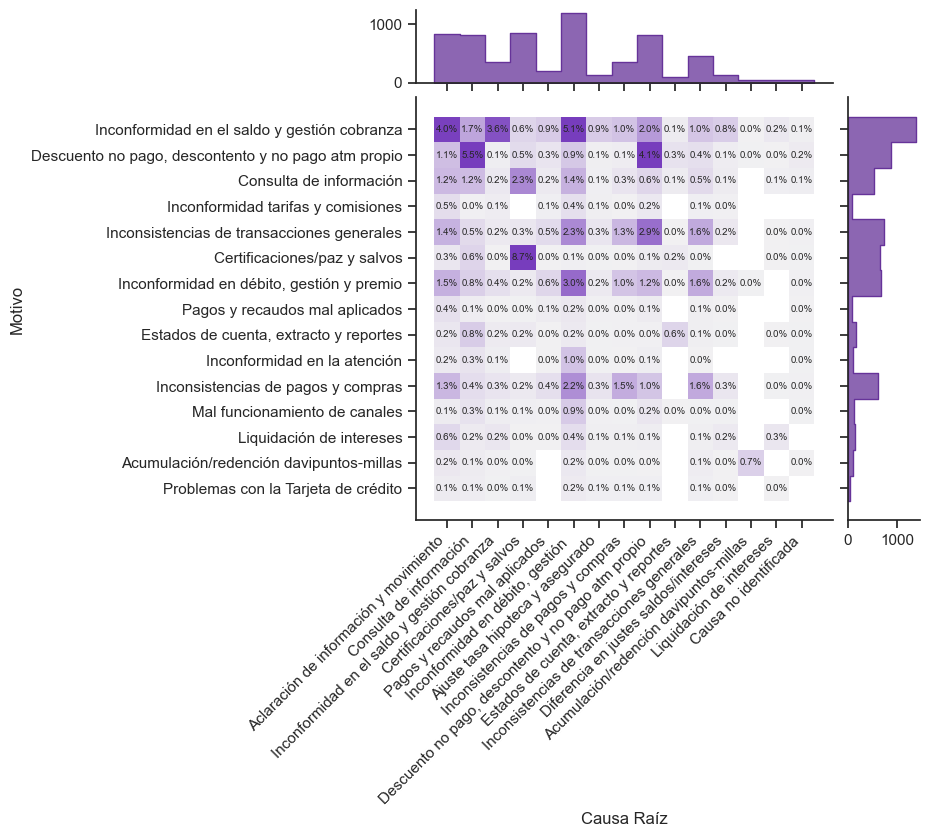

In [57]:
plot_joint_distribution(
    df,
    x="subcategory",
    y="motivo_map",
    x_order=None,
    y_order=None,
    label_rotation=45,
    y_label="Motivo",
    x_label="Causa Raíz",
    top_y=15,
    top_x=15,
    fontsize=7,
)

In [102]:
df[df["subcategory"] != df["motivo_map"]][["descripcion", "subcategory", "motivo_map"]]

,descripcion,subcategory,motivo_map
0,cliente indica que le ultimo adelanto no nomin...,Aclaración de información y movimiento,Inconformidad en el saldo y gestión cobranza
1,Transacciones primera línea,Consulta de información,"Descuento no pago, descontento y no pago atm p..."
2,Oficina 0559 cliente solicita validación o rei...,Inconformidad en el saldo y gestión cobranza,Consulta de información
3,1666 Celular Cliente Para dar Respuesta: 3162...,Certificaciones/paz y salvos,Consulta de información
4,Cliente se comunica indicando que desea realiz...,Pagos y recaudos mal aplicados,Inconformidad en el saldo y gestión cobranza
...,...,...,...
6598,En línea con lo anterior y teniendo en cuenta ...,"Descuento no pago, descontento y no pago atm p...",Inconformidad en el saldo y gestión cobranza
6599,0384 Cliente solicita que el valor del impues...,Aclaración de información y movimiento,Inconformidad en el saldo y gestión cobranza
6600,Transacción en estado ?Rechazada? en TIN ya pa...,Inconsistencias de transacciones generales,"Inconformidad en débito, gestión y premio"
6603,llll,Consulta de información,Acumulación/redención davipuntos-millas


In [58]:
subcategorias_peticiones = [
    "Consulta de información",
    "Aclaración de información y movimiento",
    "Certificaciones/paz y salvos",
    "Copia de pólizas",
    "Estados de cuenta, extracto y reportes",
    "Información errada producto-servicio",
    "Protección de datos",
    "Liquidación de intereses",
    "Acumulación/redención davipuntos-millas",
    "Felicitación a funcionario",
]

subcategorias_quejas = [
    "Inconformidad en débito y gestión",
    "Inconformidad en el saldo y gestión cobranza",
    "Inconformidad Tasa Hipoteca/Leasing y venta",
    "Notificaciones y reclamaciones erradas",
    "Indemnización seguro",
    "Inconsistencias de pagos y compras",
    "Cobro errado cuotas seguros",
    "Mal funcionamiento de canales",
    "Inconformidad en la atención",
    "Inconformidad tarifas y comisiones",
]

subcategorias_reclamos = [
    "Inconsistencias de transacciones generales",
    "Ajuste tasa hipoteca y asegurado",
    "Descuento no pago, descontento y no pago atm propio",
    "Pagos y recaudos mal aplicados",
    "Diferencia en justes saldos/intereses",
    "Embargos y deseembargos",
    "Levantamiento hipoteca",
    "Problemas con la Tarjeta de crédito",
    "Venta no abonada",
]


lista = subcategorias_peticiones + subcategorias_quejas + subcategorias_reclamos

In [59]:
df.subcategory.values.shape

(6608,)

In [60]:
aa = [True if x in lista else False for x in df.subcategory.values]


In [61]:
import numpy as np

np.array(aa)

array([ True,  True,  True, ...,  True,  True,  True])

In [62]:
sum(aa) / len(aa)

0.8028147699757869